# Лабораторная №5. Кластеризация
## Набор данных
1. Раздобудьте где-нибудь набор данных для задачи классификации. Он должен содержать не менее трёх классов.
2. Приведите его в порядок: заполните пропуски, векторизуйте, нормализуйте.
3. Спроецируйте данные на двухмерное пространство при помощи PCA/t-SNE/UMAP.
4. Визуализируйте набор данных. Если в нём визуально не наблюдаются кластеры, то лучше выбрать другой набор данных.
## Задание
1. Выберете два алгоритма кластеризации: первый с возможностью явно задать число кластеров, а второй — без.
2. Выберете две меры оценки качества кластеризации: внешнюю и внутреннюю.
3. Для первого и второго алгоритма измерьте, как зависит внешняя и внутренняя мера от числа кластеров. Для второго алгоритма требуется выбрать гиперпараметр, от которого зависит число кластеров и варьировать его.

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

Выбранный набор данных: ирисы Фишера

Набор данных содержит информацию о 150 ирисах, по 50 из каждого из трех видов: Iris setosa, Iris virginica и Iris versicolor. Каждый вид описывается четырьмя характеристиками: длиной и шириной наружной и внутренней долей околоцветника.

Используем библиотеки:

- pandas для работы с данными
- numpy для матричных операций
- seaborn для визуализации
- sklearn для применения алгоритмов кластеризации

In [109]:
# загрузка набора данных iris из sklearn
iris_dataset = datasets.load_iris()

#  создание фрейма данных
df = pd.DataFrame(data = np.c_[iris_dataset['data'], iris_dataset['target']], columns = iris_dataset['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Пропущенных значений нет. Произведем векторизацию данных:

<Axes: xlabel='PC1', ylabel='PC2'>

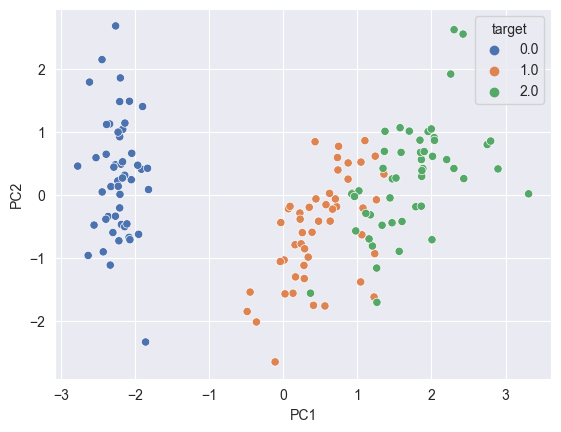

In [110]:
X = df.drop('target', axis=1)
y = df['target']

# нормализация данных
X_normalized = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

# уменьшение размерности до 2D
X_pca = pca.fit_transform(X_normalized)
X_tsne = tsne.fit_transform(X_normalized)

# создание нового фрейма данных для PCA
df_pca = pd.DataFrame(data = np.c_[X_pca, y], columns = ['PC1', 'PC2', 'target'])

# создание нового фрейма данных для t-SNE
df_tsne = pd.DataFrame(data = np.c_[X_tsne, y], columns = ['t-SNE1', 't-SNE2', 'target'])

# построение данных с использованием seaborn
sns.scatterplot(x="PC1", y="PC2", hue="target", palette="deep", data=df_pca)

Произведем кластеризацию:

### Алгоритм №1: KMeans

C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='PC1', ylabel='PC2'>

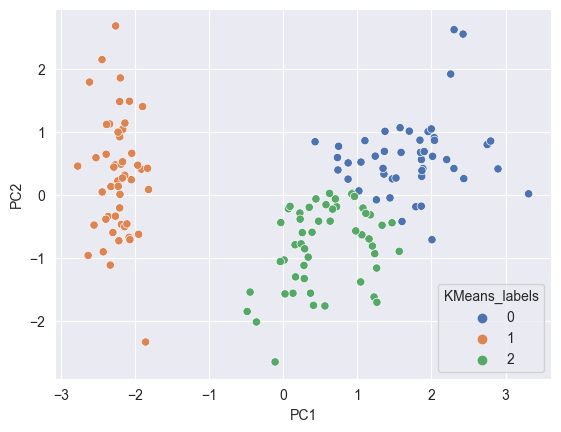

In [111]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)

# получить предсказанные метки
labels_kmeans = kmeans.predict(X_normalized)

# добавить предсказанные метки в данные
df_pca['KMeans_labels'] = labels_kmeans

# визуализировать результаты кластеризации KMeans
sns.scatterplot(x="PC1", y="PC2", hue="KMeans_labels", palette="deep", data=df_pca)

Изобразим зависимость внешней меры (Adjusted Rand Index) от числа кластеров для KMeans:

C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarni

Text(0.5, 1.0, 'KMeans clustering ARI vs number of clusters')

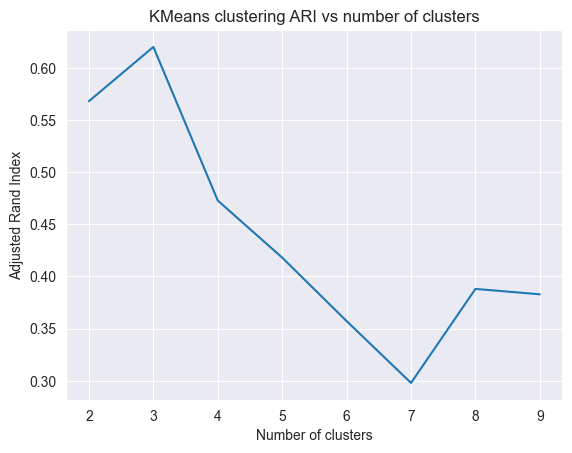

In [112]:
n_clusters = np.arange(2, 10)
ari_scores = []

for n in n_clusters:
    # выполнить KMeans с n кластерами
    kmeans = KMeans(n_clusters=n, random_state=42).fit(X_normalized)
    # получить предсказанные метки
    labels_pred = kmeans.predict(X_normalized)
    # рассчитать коэффициент внешней меры
    ari = adjusted_rand_score(y, labels_pred)
    # добавить оценку коэффициента внешней меры в список
    ari_scores.append(ari)

# построить график зависимости внешней меры от числа кластеров
sns.lineplot(x=n_clusters, y=ari_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Index")
plt.title("KMeans clustering ARI vs number of clusters")

Изобразим зависимость внутренней меры (Silhouette Score) от числа кластеров для KMeans:

C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarni

Text(0.5, 1.0, 'KMeans clustering Silhouette Score vs number of clusters')

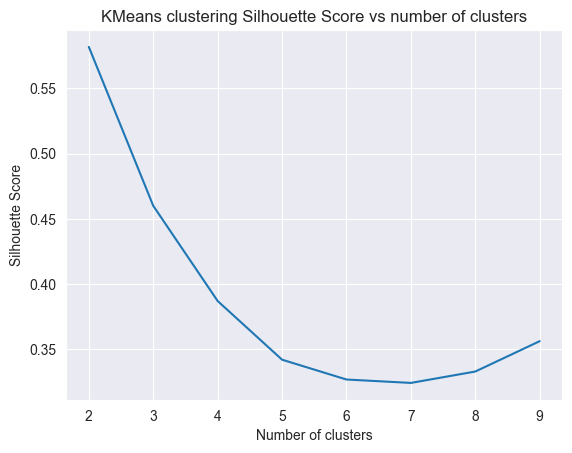

In [113]:
n_clusters = np.arange(2, 10)
silhouette_scores = []

for n in n_clusters:
    # выполнить KMeans с n кластерами
    kmeans = KMeans(n_clusters=n, random_state=42).fit(X_normalized)
    #  получить предсказанные метки
    labels_pred = kmeans.predict(X_normalized)
    # рассчитать коэффициент внутренней меры
    silhouette = silhouette_score(X_normalized, labels_pred)
    # добавить оценку коэффициента внутренней меры в список
    silhouette_scores.append(silhouette)

# построить график зависимости внутренней меры от числа кластеров
sns.lineplot(x=n_clusters, y=silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("KMeans clustering Silhouette Score vs number of clusters")

### Алгоритм №2: Agglomerative Clustering

<Axes: xlabel='PC1', ylabel='PC2'>

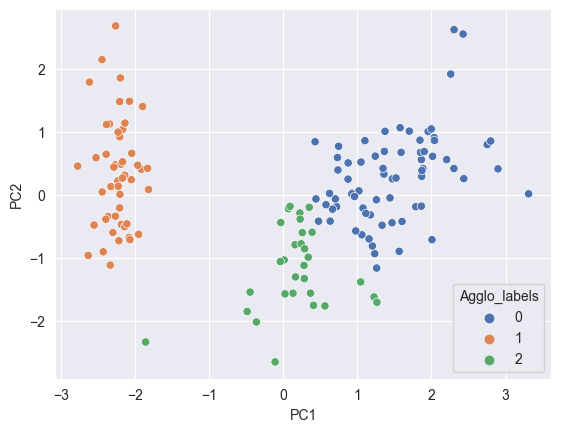

In [114]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(X_normalized)

# получить предсказанные метки
labels_agglo = agglomerative.fit_predict(X_normalized)

# добавить предсказанные метки в данные
df_pca['Agglo_labels'] = labels_agglo

# визуализировать результаты кластеризации Agglomerative
sns.scatterplot(x="PC1", y="PC2", hue="Agglo_labels", palette="deep", data=df_pca)

Изобразим зависимость внешней меры (Adjusted Rand Index) от числа кластеров для Agglomerative Clustering:

Text(0.5, 1.0, 'Agglomerative Clustering ARI vs number of clusters')

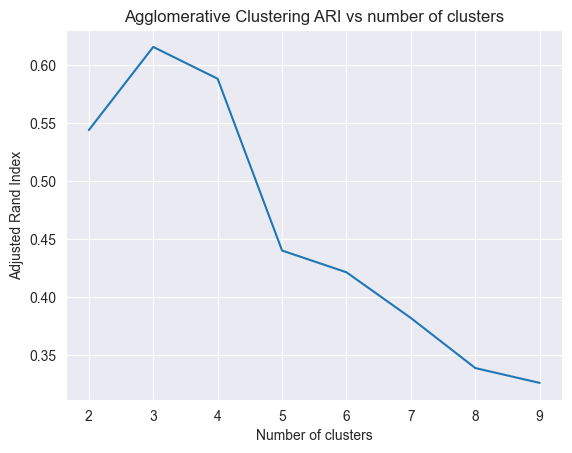

In [115]:
n_clusters = np.arange(2, 10)
ari_scores = []

for n in n_clusters:
    # выполнить Agglomerative с n кластерами
    agglomerative = AgglomerativeClustering(n_clusters=n)
    # получить предсказанные метки
    labels_pred = agglomerative.fit_predict(X_normalized)
    # рассчитать коэффициент внешней меры
    ari = adjusted_rand_score(y, labels_pred)
    # добавить оценку коэффициента внешней меры в список
    ari_scores.append(ari)

# построить график зависимости внешней меры от числа кластеров
sns.lineplot(x=n_clusters, y=ari_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Index")
plt.title("Agglomerative Clustering ARI vs number of clusters")

Изобразим зависимость внутренней меры (Silhouette Score) от числа кластеров для Agglomerative Clustering:

Text(0.5, 1.0, 'Agglomerative Clustering Silhouette Score vs number of clusters')

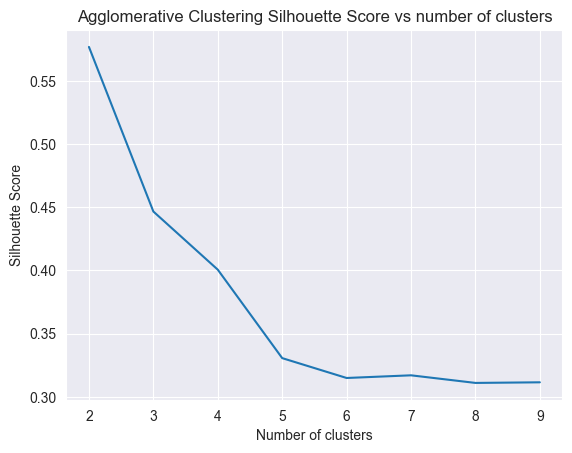

In [116]:
n_clusters = np.arange(2, 10)
silhouette_scores = []

for n in n_clusters:
    # выполнить Agglomerative с n кластерами
    agglomerative = AgglomerativeClustering(n_clusters=n)
    # получить предсказанные метки
    labels_pred = agglomerative.fit_predict(X_normalized)
    # рассчитать коэффициент внутренней меры
    silhouette = silhouette_score(X_normalized, labels_pred)
    # добавить оценку коэффициента внутренней меры в список
    silhouette_scores.append(silhouette)

# построить график зависимости внутренней меры от числа кластеров
sns.lineplot(x=n_clusters, y=silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Agglomerative Clustering Silhouette Score vs number of clusters")

### Алгоритм №3: DBSCAN

<Axes: xlabel='PC1', ylabel='PC2'>

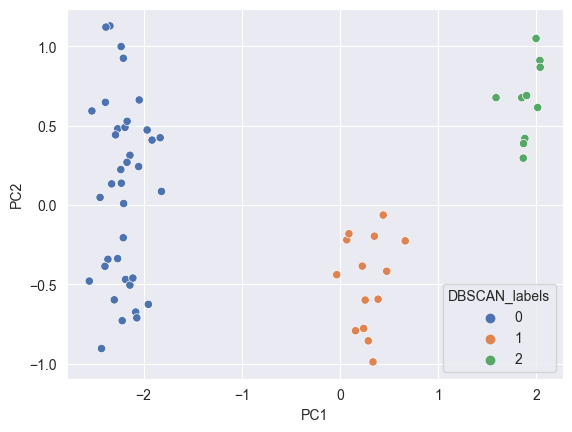

In [117]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X_normalized)

# получить предсказанные метки
labels_dbscan = dbscan.labels_

# добавить предсказанные метки в данные
df_pca['DBSCAN_labels'] = labels_dbscan

# визуализировать результаты кластеризации DBSCAN
sns.scatterplot(x="PC1", y="PC2", hue="DBSCAN_labels", palette="deep", data=df_pca[df_pca['DBSCAN_labels'] != -1])

Изобразим зависимость внешней меры (Silhouette Score) от параметра eps для DBSCAN:

Text(0.5, 1.0, 'DBSCAN Clustering ARI Score vs eps')

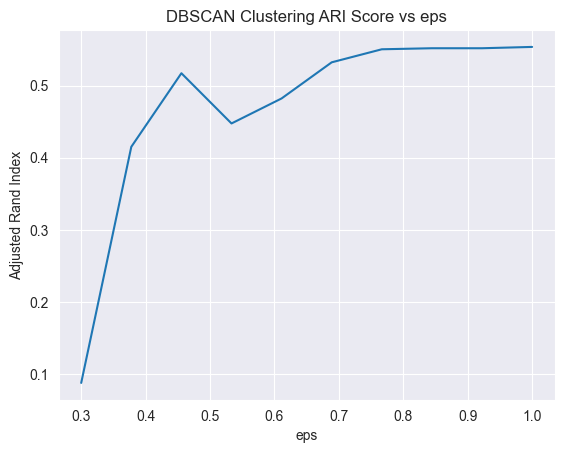

In [118]:
eps_values = np.linspace(0.3, 1.0, num=10)
ari_scores = []

for eps in eps_values:
    # выполнить DBSCAN с eps
    dbscan = DBSCAN(eps=eps)
    # получить предсказанные метки
    labels_pred = dbscan.fit_predict(X_normalized)
    # рассчитать коэффициент внешней меры
    ari = adjusted_rand_score(y, labels_pred)
    # добавить оценку коэффициента внешней меры в список
    ari_scores.append(ari)

# построить график зависимости внешней меры от eps
sns.lineplot(x=eps_values, y=ari_scores)
plt.xlabel("eps")
plt.ylabel("Adjusted Rand Index")
plt.title("DBSCAN Clustering ARI Score vs eps")

Изобразим зависимость внутренней меры (Silhouette Score) от параметра eps для DBSCAN:

Text(0.5, 1.0, 'DBSCAN Silhouette Score vs eps')

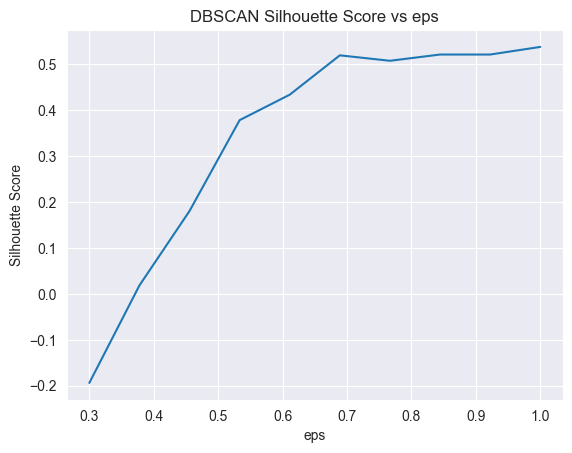

In [119]:
eps_values = np.linspace(0.3, 1.0, num=10)
silhouette_scores = []

for eps in eps_values:
    # выполнить DBSCAN с eps
    dbscan = DBSCAN(eps=eps)
    # получить предсказанные метки
    labels_pred = dbscan.fit_predict(X_normalized)
    # рассчитать коэффициент внутренней меры
    silhouette = silhouette_score(X_normalized, labels_pred)
    # добавить оценку коэффициента внутренней меры в список
    silhouette_scores.append(silhouette)

# построить график зависимости внутренней меры от eps
sns.lineplot(x=eps_values, y=silhouette_scores)
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.title("DBSCAN Silhouette Score vs eps")

Изобразим зависимость внешней меры (Silhouette Score) от параметра min_samples для DBSCAN:

Text(0.5, 1.0, 'DBSCAN Clustering ARI Score vs min_samples')

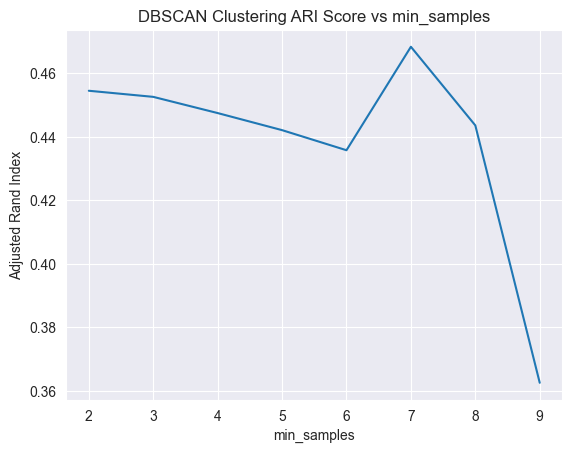

In [120]:
min_samples_values = np.arange(2, 10)
ari_scores = []

for min_samples in min_samples_values:
    # выполнить DBSCAN с min_samples
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    # получить предсказанные метки
    labels_pred = dbscan.fit_predict(X_normalized)
    # рассчитать коэффициент внешней меры
    ari = adjusted_rand_score(y, labels_pred)
    # добавить оценку коэффициента внешней меры в список
    ari_scores.append(ari)

# построить график зависимости внешней меры от
sns.lineplot(x=min_samples_values, y=ari_scores)
plt.xlabel("min_samples")
plt.ylabel("Adjusted Rand Index")
plt.title("DBSCAN Clustering ARI Score vs min_samples")

Изобразим зависимость внутренней меры (Silhouette Score) от параметра min_samples для DBSCAN:

Text(0.5, 1.0, 'DBSCAN Silhouette Score vs min_samples')

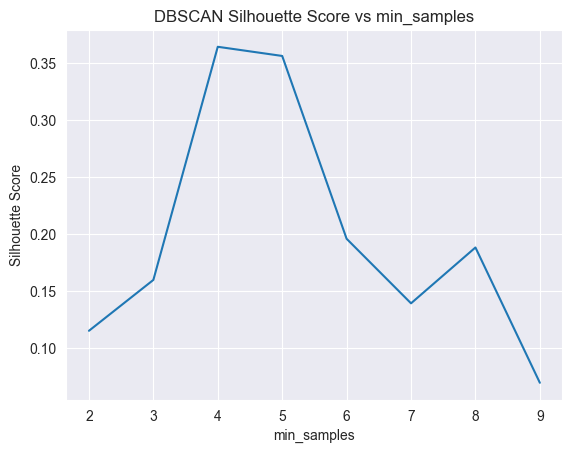

In [121]:
min_samples_values = np.arange(2, 10)
silhouette_scores = []

for min_samples in min_samples_values:
    # выполнить DBSCAN с min_samples
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    # получить предсказанные метки
    labels_pred = dbscan.fit_predict(X_normalized)
    # рассчитать коэффициент внутренней меры
    silhouette = silhouette_score(X_normalized, labels_pred)
    # добавить оценку коэффициента внутренней меры в список
    silhouette_scores.append(silhouette)

# построить график зависимости внутренней меры от
sns.lineplot(x=min_samples_values, y=silhouette_scores)
plt.xlabel("min_samples")
plt.ylabel("Silhouette Score")
plt.title("DBSCAN Silhouette Score vs min_samples")

### Выводы

Визуализация ирисов Фишера в двумерном пространстве с помощью PCA показала, что данные достаточно хорошо разделяются на 3 класса.

KMeans и Agglomerative Clustering показали приблизительно одинаковые результаты, соответствующие трем классам. Внешняя мера (Adjusted Rand Index) и внутренняя мера (Silhouette Score) показали максимумы при числе кластеров, равном 3.

DBSCAN также нашел 3 класса, но результаты зависят от выбранных параметров. При уменьшении параметра eps (радиус окрестности точки) количество кластеров возрастает, а при увеличении - уменьшается. При увеличении параметра min_samples количество кластеров уменьшается. Оптимальные значения параметров подбираются под конкретную задачу. Например, если бы было важно учитывать данные точки, которые не сгруппировались ни с одной из основных групп, то параметр min_samples следовало бы выбирать меньше.